# 使用神经网络来训练获得Embedding矩阵

In [17]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [6]:
# 导入TensorFlow的数据集
import tensorflow_datasets as tfds

imdb,info = tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)

print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [5]:
train_data,test_data = imdb['train'],imdb['test']
print(type(train_data))


<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


In [15]:
tokenizer = info.features['text'].encoder
print(tokenizer)
print(tokenizer.subwords)
print(info.features['text'])

<SubwordTextEncoder vocab_size=8185>
['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 

In [12]:

sample_string = 'TensorFlow, from basics to mastery'

tokenized_string =tokenizer.encode(sample_string)
print("Tokenizerd string is {}".format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print("The original string:{}".format(original_string))

Tokenizerd string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string:TensorFlow, from basics to mastery


In [13]:
for ts in tokenized_string:
  print('{}---->{}'.format(ts,tokenizer.decode([ts])))

6307---->Ten
2327---->sor
4043---->Fl
2120---->ow
2---->, 
48---->from 
4249---->basi
4429---->cs 
7---->to 
2652---->master
8050---->y


In [19]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

print(type(train_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


In [20]:
# 构建模型
embedding_dim = 64
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 0.6833 - accuracy: 0.5754 - val_loss: 0.6350 - val_accuracy: 0.7476
Epoch 2/10
391/391 [==============================] - 15s 37ms/step - loss: 0.5112 - accuracy: 0.7982 - val_loss: 0.4302 - val_accuracy: 0.8383
Epoch 3/10
391/391 [==============================] - 14s 37ms/step - loss: 0.3547 - accuracy: 0.8731 - val_loss: 0.3521 - val_accuracy: 0.8673
Epoch 4/10
391/391 [==============================] - 14s 37ms/step - loss: 0.2881 - accuracy: 0.8964 - val_loss: 0.3250 - val_accuracy: 0.8727
Epoch 5/10
391/391 [==============================] - 15s 38ms/step - loss: 0.2520 - accuracy: 0.9102 - val_loss: 0.3129 - val_accuracy: 0.8788
Epoch 6/10
391/391 [==============================] - 15s 37ms/step - loss: 0.2259 - accuracy: 0.9188 - val_loss: 0.3143 - val_accuracy: 0.8742
Epoch 7/10
391/391 [==============================] - 15s 37ms/step - loss: 0.2077 - accuracy: 0.9261 - val_loss: 0.3165 - val_accuracy:

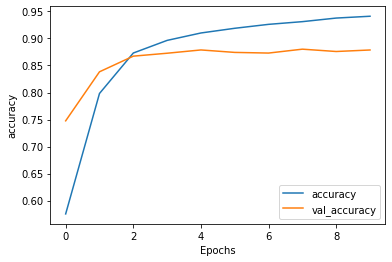

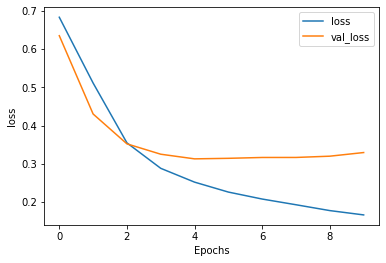

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [25]:

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>